# NBA Player/Team Social Power and Influence 

# Phase 2

*I simply gathered semi-clean data from kaggle based around 2016 to 2017 NBA stats. This data ranged from player shot selection logs to franchise attedence to even inidivual player's twitter following.*

## NBA Team Attendance
This first data set is based on each NBA team's total number of game attendee's, as well as the average attendance over the course of 41 home games. Seeing that the *'PCT' column* was not needed and that GMS column should be changed to make things a bit easier to understand.

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline




In [95]:
df_attendance = pd.read_csv("nba_2017_attendance.csv")
del df_attendance['PCT']
df_attendance.rename(columns={'GMS':'HOME_GAMES'}, inplace=True)
df_attendance.head(10)

,TEAM,HOME_GAMES,TOTAL,AVG
0,Chicago Bulls,41,888882,21680
1,Dallas Mavericks,41,811366,19789
2,Sacramento Kings,41,721928,17608
3,Miami Heat,41,805400,19643
4,Toronto Raptors,41,813050,19830
5,Los Angeles Clippers,41,782609,19088
6,Cleveland Cavaliers,41,843042,20562
7,Golden State Warriors,41,803436,19596
8,Oklahoma City Thunder,41,746323,18203
9,New York Knicks,41,810741,19774


## NBA Team Valuation
Each team carriers a valuation that is represented by *'VALUE_MILLIONS'*.

In [97]:
df_valuation = pd.read_csv("nba_2017_team_valuations.csv")
df_valuation.head(10)

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0
5,Los Angeles Clippers,2000.0
6,Brooklyn Nets,1800.0
7,Houston Rockets,1650.0
8,Dallas Mavericks,1450.0
9,Miami Heat,1350.0


Interestly enough the mean seems to be centered around 13.6 billion dollars. However taking a look at the std (709 million dollars), it's clear that the valuations fluxuate drastrically. 

In [99]:
df_valuation.describe()

,VALUE_MILLIONS
count,30.000000
mean,1355.333333
std,709.613704
min,750.000000
25%,886.250000
50%,1062.500000
75%,1600.000000
max,3300.000000


## Merging Dataframes
### (Team Attendance and Valuation)

In [101]:
df_attendance_valuation = df_attendance.merge(df_valuation, how="inner", on="TEAM")

df_attendance_valuation.head()
#4 numeric columns containing Home games, Total number of fans, average attendance, and NBA Team valuations 

,TEAM,HOME_GAMES,TOTAL,AVG,VALUE_MILLIONS
0,Chicago Bulls,41,888882,21680,2500.0
1,Dallas Mavericks,41,811366,19789,1450.0
2,Sacramento Kings,41,721928,17608,1075.0
3,Miami Heat,41,805400,19643,1350.0
4,Toronto Raptors,41,813050,19830,1125.0


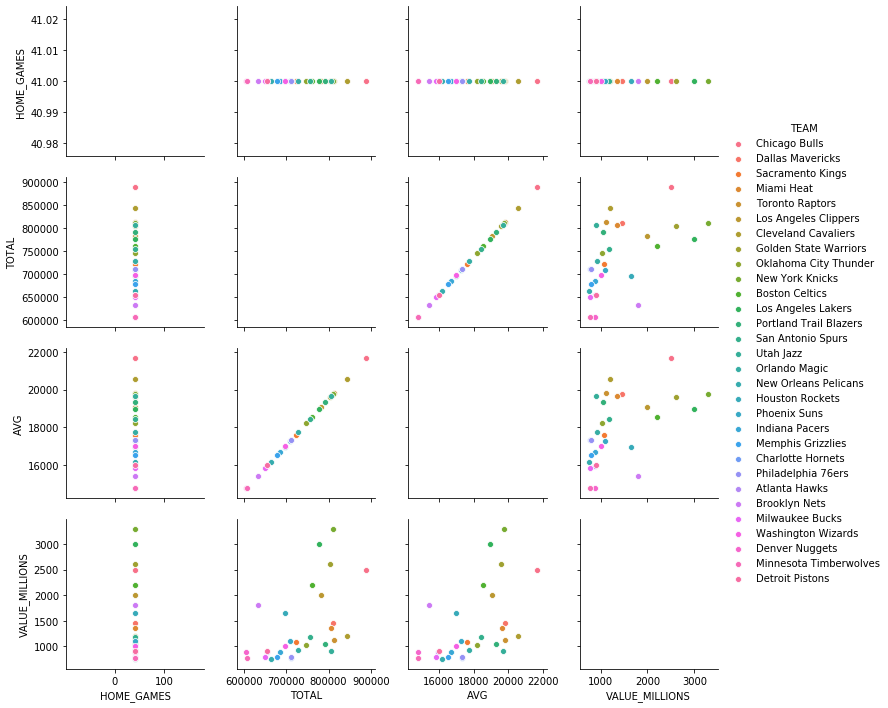

In [102]:
sns.pairplot(df_attendance_valuation, hue="TEAM")

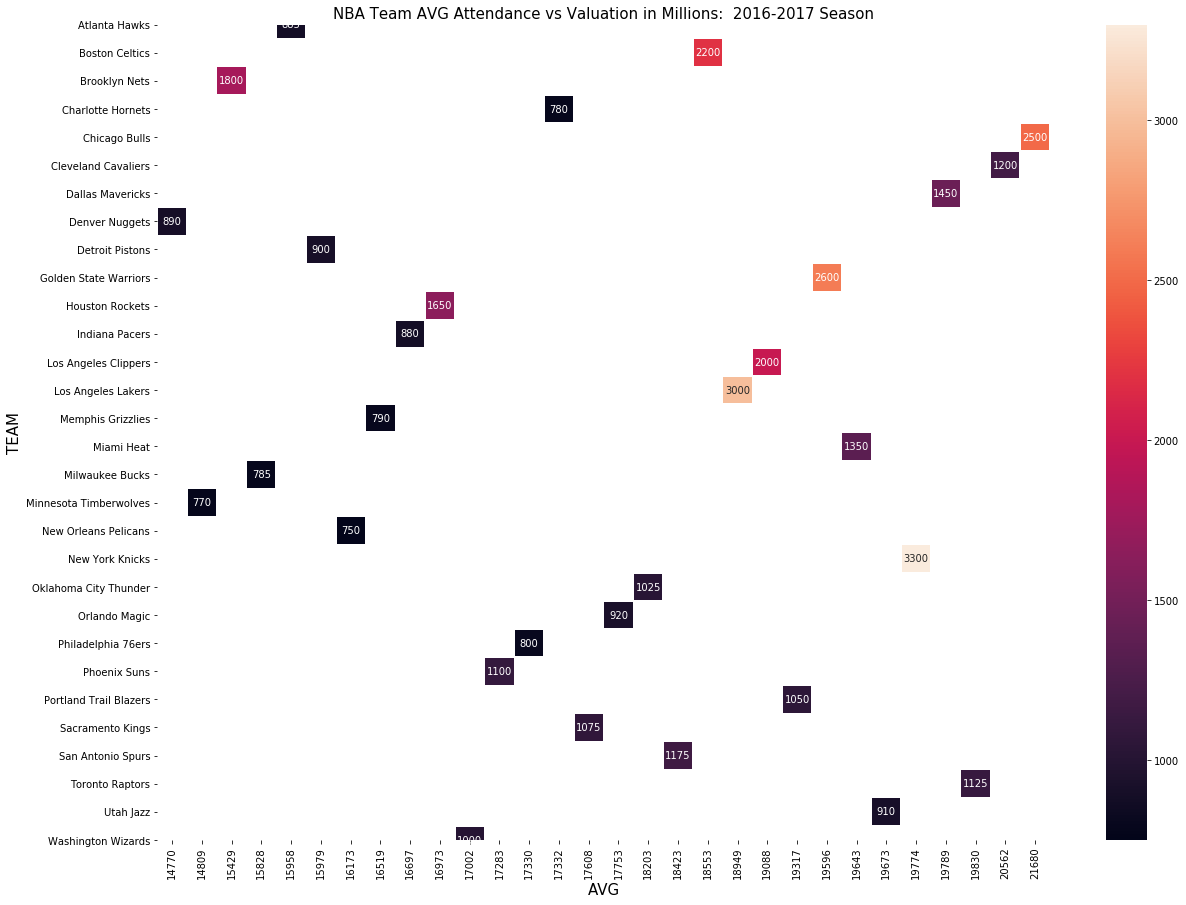

In [103]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA Team AVG Attendance vs Valuation in Millions:  2016-2017 Season", fontsize = 15)
plt.xlabel('xlabel', fontsize=15)
plt.ylabel('ylabel', fontsize=15)
sns.heatmap(valuations,linewidths=.5, annot=True, fmt='g')